In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
import keras
import random

In [ ]:
numbers = np.genfromtxt('/content/SET1.CSV', delimiter=';')
numbers = np.delete(numbers, -1, 1)
np.shape(numbers)

(10, 35)

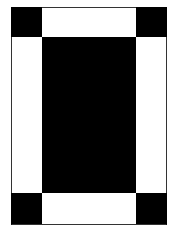

In [ ]:
plt.imshow(np.reshape(numbers[0], [7,5]),cmap=plt.cm.gray);

ax = plt.gca ()
ax.get_xaxis ().set_visible ( False )
ax.get_yaxis ().set_visible ( False )

In [ ]:
n=0
train = np.array([[0 for _ in range(36)]])
for k in range(np.shape(numbers)[0]):
  for i in range(34):
    x = [pix for pix in numbers[k]]
    if x[i] == 0: x[i]=  1. 
    else: x[i]=  0.
    for j in range(i+1, 35):
      y = [pix for pix in x]
      y = np.append(y, k)
      if y[j] == 0: y[j]=  1.
      else: y[j]=  0.
      train = np.append(train, [y], axis=0)
      n+=1
train = train[1:]
np.shape(train[0])

(36,)

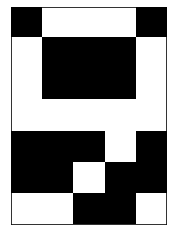

In [ ]:
plt.imshow(np.reshape(train[5943][:-1], [7,5]),cmap=plt.cm.gray);

ax = plt.gca ()
ax.get_xaxis ().set_visible ( False )
ax.get_yaxis ().set_visible ( False )

In [ ]:
train_pd = pd.DataFrame(train)
train_pd.to_csv('train.csv',sep=';',index=False, header=False)

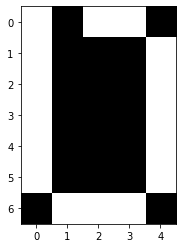

In [ ]:
train_new = np.genfromtxt('/content/train.csv', delimiter=';')
plt.imshow(np.reshape(train_new[0, :-1], [7,5]),cmap=plt.cm.gray);

In [ ]:
choice = train[np.random.choice(train.shape[0], 5950, replace=False),:]
train_x = choice[:4900,:-1]
train_y = choice[:4900, -1]
test_x = choice[4900:,:-1]
test_y = choice[4900:,-1]

In [ ]:
train_x.shape[1]

35

In [ ]:
choice[4900, -1]

9.0

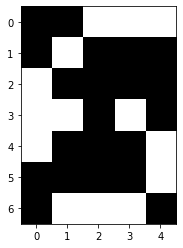

In [ ]:
plt.imshow(np.reshape(train_x[1], [7,5]),cmap=plt.cm.gray);

In [ ]:
train_y = keras.utils.to_categorical(train_y)[:,:]


In [ ]:
test_y[test_y == 9]

array([9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.,
       9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

In [ ]:
   sgd = SGD()
model = Sequential()
model.add(Dense(10, kernel_initializer='glorot_uniform', 
                input_dim=train_x.shape[1], activation='sigmoid'))
model.compile(loss='categorical_crossentropy')
model.fit(x=train_x, y=train_y, batch_size = 100, epochs=49,verbose=1)

Epoch 1/49
49/49 [==============================] - 1s 3ms/step - loss: 2.1502
Epoch 2/49
49/49 [==============================] - 0s 5ms/step - loss: 1.7023
Epoch 3/49
49/49 [==============================] - 0s 9ms/step - loss: 1.3358
Epoch 4/49
49/49 [==============================] - 0s 4ms/step - loss: 1.0330
Epoch 5/49
49/49 [==============================] - 0s 4ms/step - loss: 0.7918
Epoch 6/49
49/49 [==============================] - 0s 4ms/step - loss: 0.6075
Epoch 7/49
49/49 [==============================] - 0s 6ms/step - loss: 0.4669
Epoch 8/49
49/49 [==============================] - 0s 4ms/step - loss: 0.3626
Epoch 9/49
49/49 [==============================] - 0s 5ms/step - loss: 0.2861
Epoch 10/49
49/49 [==============================] - 0s 6ms/step - loss: 0.2291
Epoch 11/49
49/49 [==============================] - 0s 4ms/step - loss: 0.1865
Epoch 12/49
49/49 [==============================] - 0s 4ms/step - loss: 0.1544
Epoch 13/49
49/49 [==============================

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                360       
                                                                 
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________


In [ ]:
predict = model.predict(x=test_x)
classes_x=np.argmax(predict,axis=1)

33/33 [==============================] - 0s 2ms/step


In [ ]:
p = 0
for i in range(test_y.shape[0]):
  if test_y[i] == classes_x[i]:
    p+=1
p/test_y.shape[0]*100

99.80952380952381

In [ ]:
classes_x

array([8, 5, 6, ..., 4, 8, 9])

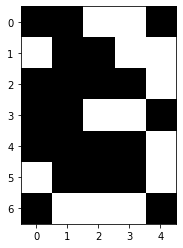

In [ ]:
plt.imshow(np.reshape(test_x[645],[7,5]),cmap=plt.cm.gray)